<a href="https://colab.research.google.com/github/Zinubett/back/blob/main/TP_RN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib
!pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=bfc7f554760dc15ad96082407a360038173e27b1984fc73e53e9479819bf68a6
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 199 kB 13.3 MB/s 
     |████████████████████████████████| 156 kB 45.5 MB/s 
     |████████████████████████████████| 9.4 

In [4]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
#1:Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet
iris_Species = pd.read_csv("Iris.csv")

In [5]:
#2:Afficher les 10 premières lignes du DataFrame
iris_Species.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
#3:Afficher les dimensions du dataframe
iris_Species.shape

(150, 6)

Found existing installation: matplotlib 3.6.2
Uninstalling matplotlib-3.6.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


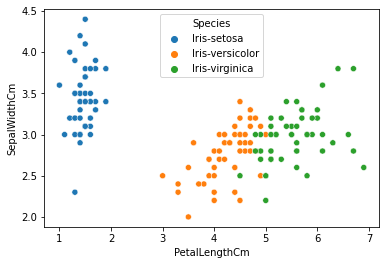

In [7]:
#4:Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.
!pip uninstall matplotlib
!pip install matplotlib==3.1.3
!pip install seaborn
import seaborn as sns
sns.scatterplot(x='PetalLengthCm', y ='SepalWidthCm' , data = iris_Species , hue = 'Species')

In [8]:
#5:Ecrire un script python permettant de labelliser les différentes espèces d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )
iris_Species.loc[iris_Species["Species"] == "Iris-setosa" , "Species"] = 0
iris_Species.loc[iris_Species["Species"] == "Iris-versicolor" , "Species"] = 1
iris_Species.loc[iris_Species["Species"] == "Iris-virginica" , "Species"] = 2

In [9]:
#6:Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels
iris_Species.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [10]:
#7:Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%)
from sklearn.model_selection import train_test_split 
X_data = iris_Species.iloc[:, 1:5].values
Y_data = iris_Species.iloc[:, 5].values
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.3)

In [11]:
#8:Afficher les 10 premières données d’apprentissage et celles de test
print("\n Train Test Dimensions:\n------------------------------------------------------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print("\n Les 10 premières données d’apprentissage et celles de test (X):\n------------------------------------------------------------------------------------")
print(X_train[0:10], '\n\n', X_test[0:10])
print("\n Les 10 premières données d’apprentissage et celles de test (Y):\n------------------------------------------------------------------------------------")
print(Y_train[0:10], '\n\n', Y_test[0:10])


 Train Test Dimensions:
------------------------------------------------------------------------------------
(105, 4) (105,) (45, 4) (45,)

 Les 10 premières données d’apprentissage et celles de test (X):
------------------------------------------------------------------------------------
[[5.5 2.4 3.7 1. ]
 [6.1 2.8 4.  1.3]
 [6.2 3.4 5.4 2.3]
 [5.8 2.7 4.1 1. ]
 [5.6 2.8 4.9 2. ]
 [6.4 3.1 5.5 1.8]
 [6.7 3.  5.2 2.3]
 [6.1 2.8 4.7 1.2]
 [4.9 2.5 4.5 1.7]
 [4.8 3.  1.4 0.3]] 

 [[6.7 3.1 5.6 2.4]
 [5.  3.6 1.4 0.2]
 [5.1 3.4 1.5 0.2]
 [6.1 2.6 5.6 1.4]
 [5.8 2.7 5.1 1.9]
 [5.  3.  1.6 0.2]
 [5.7 2.5 5.  2. ]
 [5.6 2.9 3.6 1.3]
 [6.3 2.7 4.9 1.8]
 [6.8 3.  5.5 2.1]]

 Les 10 premières données d’apprentissage et celles de test (Y):
------------------------------------------------------------------------------------
[1 1 2 1 2 2 2 1 2 0] 

 [2 0 0 2 2 0 2 1 2 2]


In [12]:
#9:Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150)
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(epsilon=0.07, max_iter=150,  solver='lbfgs')
# apprentissage avec les deux premières variables
clf.fit(X_train, Y_train.astype('int'))


MLPClassifier(epsilon=0.07, max_iter=150, solver='lbfgs')

In [13]:
#10:Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse
prediction = clf.predict(X_test)
print(prediction)
Y_test.astype('int')
from sklearn import metrics
print('précision du Perceptron multicouche est:',metrics.accuracy_score(prediction,Y_test.astype('int')))

[2 0 0 2 2 0 2 1 2 2 1 1 1 1 0 0 0 1 2 1 1 2 0 0 0 2 0 0 1 1 1 2 2 2 0 2 1
 2 0 1 0 1 2 1 2]
précision du Perceptron multicouche est: 0.9777777777777777


In [14]:
#11:Afficher la matrice de confusion associée à notre cas
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test.astype('int'),prediction))

[[14  0  0]
 [ 0 14  0]
 [ 0  1 16]]


In [15]:
#12:Selon les résultats affichés commenter le perceptron que vous avez utilisé
#Les résultats d'une matrice de confusion sont classés en quatre grandes catégories :
# les vrais positifs, les vrais négatifs, les faux positifs et les faux négatifs.
#Notre modèle d'apprentissage caractérisé par une accurancy élevée = 93,33 %



In [16]:
#13:On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.2,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.7,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.2,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.7,
        "max_iter" : 150
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate 0.2",
    "constant learning-rate 0.7",
    "inv-scaling learning-rate 0.2",
    "inv-scaling learning-rate 0.7",
    "adam 0.01",
]

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

dataClassifiers = []
for i in range(len(params)):
  classifier = MLPClassifier(random_state=0, **params[i])
  classifier.fit(X_train, Y_train.astype('int'))
  print(labels[i]," : ",classifier.score(X_train, Y_train.astype('int')))
  dataClassifiers.append(classifier)




constant learning-rate 0.2  :  0.34285714285714286
constant learning-rate 0.7  :  0.34285714285714286
inv-scaling learning-rate 0.2  :  0.9714285714285714
inv-scaling learning-rate 0.7  :  0.9714285714285714


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


adam 0.01  :  0.9809523809523809


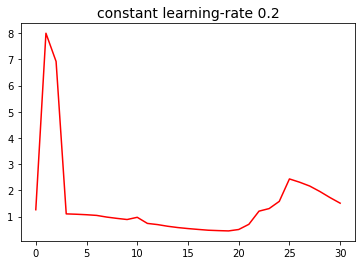

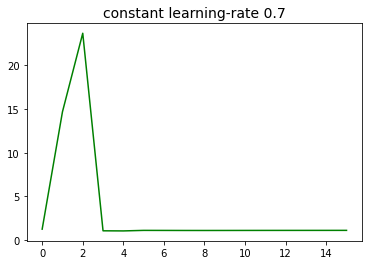

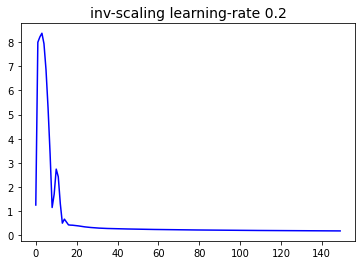

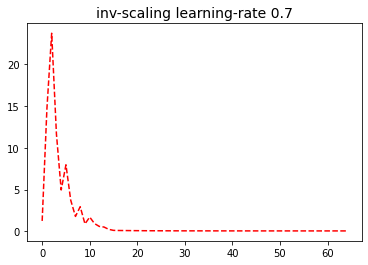

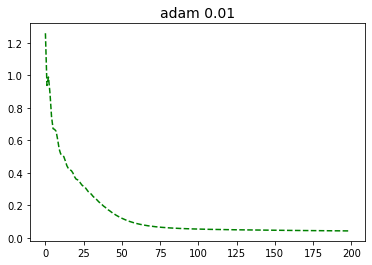

In [17]:
#14:-Nous allons étudier la variation du paramètre de taux d’apprentissage, donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test en fonction de variation du taux d’apprentissage
import matplotlib.pyplot as plt
plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
]

for i in range(len(dataClassifiers)):
  plt.plot(dataClassifiers[i].loss_curve_, **plot_args[i])
  plt.title(labels[i], fontsize=14)
  plt.show()

In [18]:
#15:Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début. Quel est le phénomène constaté ? et comment pouvons- nous surmonter celui-ci
from sklearn import preprocessing
from tensorflow import keras

label_encoder = preprocessing.LabelEncoder()
iris_Species['Species'] = label_encoder.fit_transform(
                                iris_Species['Species'])
np_iris = iris_Species.to_numpy()
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data,3)
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.3)


#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#16:-Tester d’autres classifieurs de type réseau de neurones (Dynamique/Récurrent et Non récurrent)


In [ ]:
#Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir un réseau de neurones récurrent ou non ? justifier vos réponses
non